#0. Prepare Data
##Since we deal a lot with genres, it is convenient to add "genres" feature column to main data. 
As my TA suggested, I'll look at each artists list and its first artist. If it exactly matches one of the artist in the dataset "data_w_genres", I'll append genres list to that row.

In [68]:
import pandas as pd
import numpy as np

data = pd.read_csv("data.csv")
dataw_genres = pd.read_csv("data_w_genres.csv")

data.info() ## There is no null value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [70]:
#See that artist column consist of list values
data.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [71]:
# Actually they are not list values. They are strings.
data['artists'][10054][0]

'['

##0.1. Dealing with 'artists' column

In [72]:
# Cast string type of values to lists for 'artists' column
data['artists'] = data.artists.apply(lambda x: x[1:-1].split(','))
data['artists'][45064][0]

"'Chet Baker'"

In [73]:
# Take only the first artist in each list (as our TA suggested)
data.loc[:, 'artists'] = data.artists.map(lambda x: x[0])
data.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,'DJ Combo',0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,'Alessia Cara',0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,'Roger Fly',0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,'Taylor Swift',0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,'Roger Fly',0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [74]:
data['artists'][1]

'"Screamin\' Jay Hawkins"'

In [75]:
# Remove the extra quote marks from the column
data['artists']= data['artists'].str.slice(start = 1)
data['artists'] = data['artists'].str.slice(stop = -1)
data['artists'][1]

"Screamin' Jay Hawkins"

##0.2. Appending 'genres' column to main 'data.csv'



In [76]:
dataw_genres = dataw_genres[['artists', 'genres']] # No need other columns
dataw_genres.info() # No null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32539 entries, 0 to 32538
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   artists  32539 non-null  object
 1   genres   32539 non-null  object
dtypes: object(2)
memory usage: 508.5+ KB


In [77]:
dataw_genres['artists'][0] # No extra quote marks

'"Cats" 1981 Original London Cast'

In [78]:
# This is where we merge two dataframes
# The following code
data = pd.merge(data, dataw_genres, how='inner', on=['artists'])
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,173600.000000,173600.000000,1.736000e+05,173600.000000,173600.000000,173600.000000,173600.000000,173600.000000,173600.000000,173600.000000,173600.000000,173600.000000,173600.000000,173600.000000,173600.000000
mean,0.499323,0.536732,2.327701e+05,0.482870,0.068145,0.197574,5.204965,0.211095,-11.744242,0.702385,25.667212,0.105867,117.017184,0.524488,1977.053232
std,0.380113,0.176113,1.484135e+05,0.272819,0.251996,0.334782,3.518302,0.180409,5.693265,0.457211,21.885704,0.182537,30.263679,0.264569,26.936406
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087300,0.414000,1.661070e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.904000,0.000000,1.000000,0.035200,93.938750,0.310000,1955.000000
50%,0.518000,0.548000,2.057730e+05,0.465000,0.000000,0.000526,5.000000,0.138000,-10.828000,1.000000,25.000000,0.045500,115.825000,0.536000,1977.000000
75%,0.895000,0.669000,2.656800e+05,0.711000,0.000000,0.254000,8.000000,0.270000,-7.489000,1.000000,42.000000,0.076400,135.015000,0.744000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173600 entries, 0 to 173599
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      173600 non-null  float64
 1   artists           173600 non-null  object 
 2   danceability      173600 non-null  float64
 3   duration_ms       173600 non-null  int64  
 4   energy            173600 non-null  float64
 5   explicit          173600 non-null  int64  
 6   id                173600 non-null  object 
 7   instrumentalness  173600 non-null  float64
 8   key               173600 non-null  int64  
 9   liveness          173600 non-null  float64
 10  loudness          173600 non-null  float64
 11  mode              173600 non-null  int64  
 12  name              173600 non-null  object 
 13  popularity        173600 non-null  int64  
 14  release_date      173600 non-null  object 
 15  speechiness       173600 non-null  float64
 16  tempo             17

In [ ]:
data.tail()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,rock,classic rock,adult standards,mellow gold,album rock,folk rock,soft rock,classical,country rock,vocal jazz,soul,lounge,art rock,hard rock,brill building pop,folk,jazz,cool jazz,bebop,psychedelic rock,roots rock,blues rock,dance pop,dance rock,pop,rap,permanent wave,swing,funk,hip hop
173595,173595,0.8520,[],0.555,174010,0.299,1,7Kvz6HUGWyzKpLewRNykaa,0.690000,9,0.1540,-9.661,1,2020 was the worst year of my fucking life - F...,5,0.5970,109.204,0.618,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173596,173596,0.2820,[],0.608,313253,0.368,0,1AL6lQa6NHNwOKTtVfMFga,0.000002,5,0.0908,-8.539,0,10years vintage - LiVE from 2020.3.5 @EBISU LI...,12,0.0278,125.941,0.212,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173597,173597,0.8250,[],0.695,103343,0.232,0,3JPnVN4wYlmQnuD7OgDx88,0.000000,1,0.5900,-11.010,1,Saint Bernard,68,0.0972,100.488,0.451,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173598,173598,0.0205,[],0.749,197573,0.820,0,3DTqHfTGj1c6y2gDXsTez4,0.000685,7,0.0775,-6.114,1,Regardless,76,0.0478,120.066,0.534,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
173599,173599,0.1250,[],0.755,193555,0.882,1,2GIJ1Lw3ZoYUUYCABVjPcQ,0.001420,10,0.1030,-1.957,0,Baby,1,0.0532,99.984,0.606,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# There is no need to know exact date of release, so just drop the column.
data.drop(['release_date'], axis=1, inplace=True)

##0.3. Dealing with 'year' column 
Working on so many different years does not seem efficient. Rather, just use decades.

In [ ]:
data['year'] = (data['year']//10)*10
data

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,rock,classic rock,adult standards,mellow gold,album rock,folk rock,soft rock,classical,country rock,vocal jazz,soul,lounge,art rock,hard rock,brill building pop,folk,jazz,cool jazz,bebop,psychedelic rock,roots rock,blues rock,dance pop,dance rock,pop,rap,permanent wave,swing,funk,hip hop
0,0,0.9910,[],0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.634,1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.9930,[],0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,0.1740,97.600,0.689,1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.9920,[],0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,-12.453,1,Don't You Advertise Your Man,5,0.0592,85.652,0.487,1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.9950,[],0.482,198000,0.2290,0,0lqEx4vktZP1y9hnwfF27Y,0.000061,7,0.5490,-12.619,1,Kansas City Man Blues - 78rpm Version,4,0.0812,77.232,0.461,1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.9920,[],0.574,189800,0.1380,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.2330,-14.171,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,0.1090,158.422,0.764,1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173595,173595,0.8520,[],0.555,174010,0.2990,1,7Kvz6HUGWyzKpLewRNykaa,0.690000,9,0.1540,-9.661,1,2020 was the worst year of my fucking life - F...,5,0.5970,109.204,0.618,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173596,173596,0.2820,[],0.608,313253,0.3680,0,1AL6lQa6NHNwOKTtVfMFga,0.000002,5,0.0908,-8.539,0,10years vintage - LiVE from 2020.3.5 @EBISU LI...,12,0.0278,125.941,0.212,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173597,173597,0.8250,[],0.695,103343,0.2320,0,3JPnVN4wYlmQnuD7OgDx88,0.000000,1,0.5900,-11.010,1,Saint Bernard,68,0.0972,100.488,0.451,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173598,173598,0.0205,[],0.749,197573,0.8200,0,3DTqHfTGj1c6y2gDXsTez4,0.000685,7,0.0775,-6.114,1,Regardless,76,0.0478,120.066,0.534,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


##0.4. Dealing with 'genres' column
 Since this column consist of list values, we should take care of it

In [ ]:
a = 0
for i, l in enumerate(data["genres"]):
    a+=1
    if a == 6:
      break
    print("list",i,"is",type(l))
# See that they are actually 'str'    

list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 4 is <class 'str'>


In [ ]:
data["genres"] = data["genres"].apply(eval)
a = 0
for i, l in enumerate(data["genres"]):
    a+=1
    if a == 6:
      break
    print("list",i,"is",type(l))
# Now they are list, as expected 

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>


The code below creates a dataframe including all different type of genres

In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [ ]:
to_1D(data["genres"]).value_counts()

deep talent show          9
contemporary country      9
rap                       4
pop rap                   4
pop                       4
dance pop                 4
electropop                4
pop rock                  4
post-teen pop             4
alternative metal         3
trap                      3
philly rap                2
melodic rap               2
nu metal                  2
metalcore                 1
canadian metal            1
canadian rock             1
post-grunge               1
north carolina hip hop    1
industrial rock           1
hard rock                 1
hip hop                   1
conscious hip hop         1
emo rap                   1
rap rock                  1
chicago rap               1
southern hip hop          1
miami hip hop             1
drill                     1
chicago drill             1
industrial metal          1
dtype: int64

In [ ]:
unique_items = to_1D(data["genres"]).value_counts().index

In [ ]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: 1 if item in x  else np.nan )
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [ ]:
genres_bool = boolean_df(data["genres"], unique_items)

In [ ]:
genres_bool.head()

,deep talent show,contemporary country,rap,pop rap,pop,dance pop,electropop,pop rock,post-teen pop,alternative metal,trap,philly rap,melodic rap,nu metal,metalcore,canadian metal,canadian rock,post-grunge,north carolina hip hop,industrial rock,hard rock,hip hop,conscious hip hop,emo rap,rap rock,chicago rap,southern hip hop,miami hip hop,drill,chicago drill,industrial metal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3012 distinct column is a lot. We can define a threshold to drop some of these columns.

In [ ]:
genres_bool = genres_bool.dropna(thresh=5000, axis=1)
genres_bool = genres_bool.fillna(0)
genres_bool.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Empty DataFrame

##0.5 Merging dataframes

In [ ]:
data = pd.concat([data,genres_bool], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173600 entries, 0 to 173599
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   acousticness        173600 non-null  float64
 1   artists             173600 non-null  object 
 2   danceability        173600 non-null  float64
 3   duration_ms         173600 non-null  int64  
 4   energy              173600 non-null  float64
 5   explicit            173600 non-null  int64  
 6   id                  173600 non-null  object 
 7   instrumentalness    173600 non-null  float64
 8   key                 173600 non-null  int64  
 9   liveness            173600 non-null  float64
 10  loudness            173600 non-null  float64
 11  mode                173600 non-null  int64  
 12  name                173600 non-null  object 
 13  popularity          173600 non-null  int64  
 14  speechiness         173600 non-null  float64
 15  tempo               173600 non-nul

In [ ]:
data.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,rock,classic rock,adult standards,mellow gold,album rock,folk rock,soft rock,classical,country rock,vocal jazz,soul,lounge,art rock,hard rock,brill building pop,folk,jazz,cool jazz,bebop,psychedelic rock,roots rock,blues rock,dance pop,dance rock,pop,rap,permanent wave,swing,funk,hip hop
120535,120535,0.721,[livia Rodrig],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,0.0601,143.874,0.132,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
117368,117368,0.468,[riana Grand],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,0.0878,144.015,0.682,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
120935,120935,0.221,[4kGold],0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,0.0369,90.989,0.756,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120862,120862,0.212,[AROL ],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,0.1520,163.908,0.838,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120942,120942,0.401,[ad Bunn],0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,0.0544,109.928,0.145,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##0.6. Save the Custom Data

In [ ]:
data.to_csv('data_custom.csv')

In [ ]:
from google.colab import files
files.download("data_custom.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#1. Visualizations descriptive statistics of the dataset

In [ ]:
import pandas as pd
data_custom = pd.read_csv("data_custom.csv")

In [ ]:
data_custom['popularity'].mean()

5.819890501275134

In [ ]:
data_custom['popularity'].max()

85.0

In [ ]:
data_custom['popularity'].min()

0.0

In [ ]:
data_custom['popularity'].std()

11.809443843746857

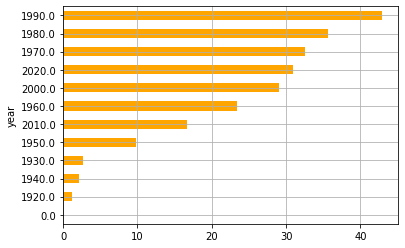

In [ ]:
data_custom.groupby(by = 'year')['popularity'].mean().sort_values().plot.barh(
    grid = True, color = 'orange'
)


Text(0.5, 1.0, 'Number of songs among that years')

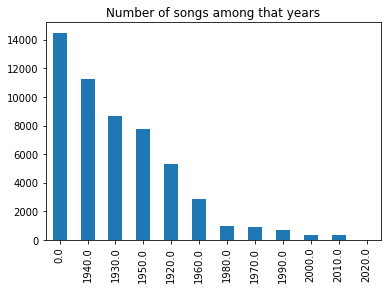

In [ ]:
from scipy import stats

ax = data_custom['year'].value_counts().plot.bar()
ax.set_title('Number of songs among that years')

In [ ]:
df = data_custom.sort_values('popularity', ascending = False)
df[["energy","popularity"]].head(50).corr()

,energy,popularity
energy,1.000000,0.189585
popularity,0.189585,1.000000


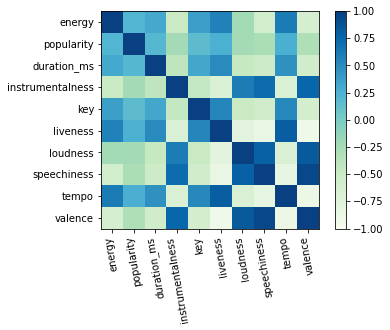

In [ ]:
corrs = data_custom[["acousticness","energy","popularity","duration_ms","instrumentalness","explicit","key","liveness","loudness","mode","speechiness","tempo","valence"]].corr()

plt.imshow(corrs, cmap="GnBu",vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns,rotation=100)
plt.yticks(range(len(corrs)),corrs.index)

plt.show()

#2. Example visualizations of aggregated forms based on features 
##(One example can be grouping the dataset based on genres and comparing distributions or centrality metrics of features for different genres)

##Based on Genres

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  


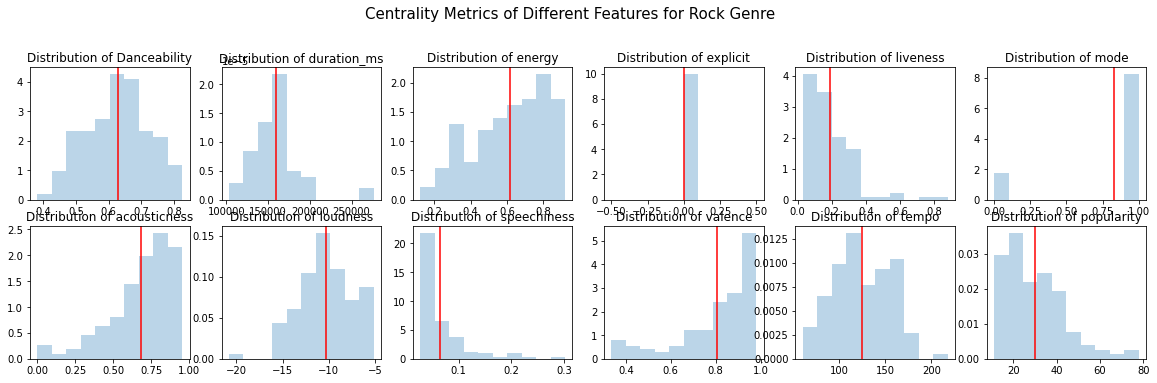

In [ ]:
import matplotlib.pyplot as plt

filter = data_custom["rock"] == True

fig, axes = plt.subplots(2, 6, figsize=(20, 6), constrained_layout=True)
fig.subplots_adjust(top=0.8)
# plot Danceability distribution and its mean
axes[0][0].set_title("Distribution of Danceability")
axes[0][0].hist(data_custom["danceability"][filter], alpha=0.3, density=True)
axes[0][0].axvline(data_custom['danceability'][filter].mean(), 0, 1, c="r")

# plot duration_ms distribution and its mean
axes[0][1].set_title("Distribution of duration_ms")
axes[0][1].hist(data_custom["duration_ms"][filter], alpha=0.3, density=True)
axes[0][1].axvline(data_custom['duration_ms'][filter].mean(), 0, 1, c="r")

# plot energy distribution and its mean
axes[0][2].set_title("Distribution of energy")
axes[0][2].hist(data_custom["energy"][filter], alpha=0.3, density=True)
axes[0][2].axvline(data_custom['energy'][filter].mean(), 0, 1, c="r")

# plot explicit distribution and its mean
axes[0][3].set_title("Distribution of explicit")
axes[0][3].hist(data_custom["explicit"][filter], alpha=0.3, density=True)
axes[0][3].axvline(data_custom['explicit'][filter].mean(), 0, 1, c="r")

# plot liveness distribution and its mean
axes[0][4].set_title("Distribution of liveness")
axes[0][4].hist(data_custom["liveness"][filter], alpha=0.3, density=True)
axes[0][4].axvline(data_custom['liveness'][filter].mean(), 0, 1, c="r")

# plot mode distribution and its mean
axes[0][5].set_title("Distribution of mode")
axes[0][5].hist(data_custom["mode"][filter], alpha=0.3, density=True)
axes[0][5].axvline(data_custom['mode'][filter].mean(), 0, 1, c="r")

# plot acousticness distribution and its mean
axes[1][0].set_title("Distribution of acousticness")
axes[1][0].hist(data_custom["acousticness"][filter], alpha=0.3, density=True)
axes[1][0].axvline(data_custom['acousticness'][filter].mean(), 0, 1, c="r")

# plot loudness distribution and its mean
axes[1][1].set_title("Distribution of loudness")
axes[1][1].hist(data_custom["loudness"][filter], alpha=0.3, density=True)
axes[1][1].axvline(data_custom['loudness'][filter].mean(), 0, 1, c="r")

# plot speechiness distribution and its mean
axes[1][2].set_title("Distribution of speechiness")
axes[1][2].hist(data_custom["speechiness"][filter], alpha=0.3, density=True)
axes[1][2].axvline(data_custom['speechiness'][filter].mean(), 0, 1, c="r")

# plot valence distribution and its mean
axes[1][3].set_title("Distribution of valence")
axes[1][3].hist(data_custom["valence"][filter], alpha=0.3, density=True)
axes[1][3].axvline(data_custom['valence'][filter].mean(), 0, 1, c="r")

# plot tempo distribution and its mean
axes[1][4].set_title("Distribution of tempo")
axes[1][4].hist(data_custom["tempo"][filter], alpha=0.3, density=True)
axes[1][4].axvline(data_custom['tempo'][filter].mean(), 0, 1, c="r")

# plot popularity distribution and its mean
axes[1][5].set_title("Distribution of popularity")
axes[1][5].hist(data_custom["popularity"][filter], alpha=0.3, density=True)
axes[1][5].axvline(data_custom['popularity'][filter].mean(), 0, 1, c="r")


fig.suptitle('Centrality Metrics of Different Features for Rock Genre\n ', fontsize=15, y=0.94)


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


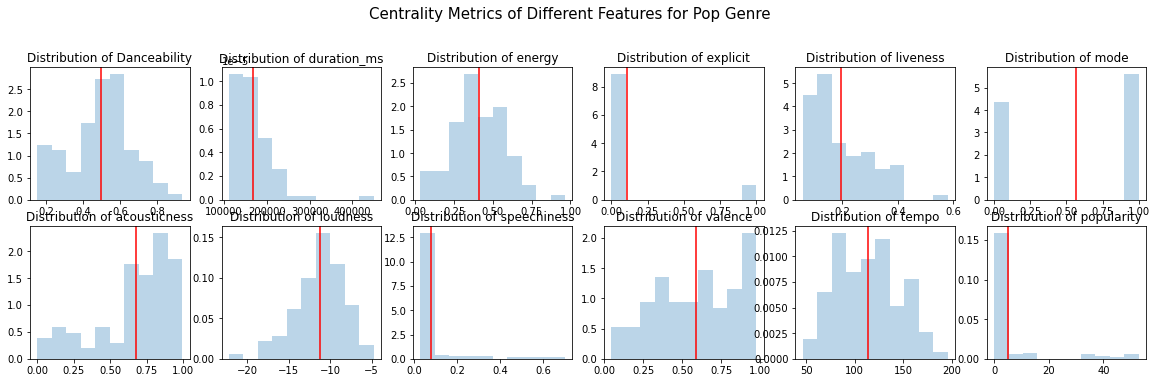

In [ ]:
filter2 = data_custom["pop"] == True

fig, axes = plt.subplots(2, 6, figsize=(20, 6), constrained_layout=True)
fig.subplots_adjust(top=0.8)
# plot Danceability distribution and its mean
axes[0][0].set_title("Distribution of Danceability")
axes[0][0].hist(data_custom["danceability"][filter2], alpha=0.3, density=True)
axes[0][0].axvline(data_custom['danceability'][filter2].mean(), 0, 1, c="r")

# plot duration_ms distribution and its mean
axes[0][1].set_title("Distribution of duration_ms")
axes[0][1].hist(data_custom["duration_ms"][filter2], alpha=0.3, density=True)
axes[0][1].axvline(data_custom['duration_ms'][filter2].mean(), 0, 1, c="r")

# plot energy distribution and its mean
axes[0][2].set_title("Distribution of energy")
axes[0][2].hist(data_custom["energy"][filter2], alpha=0.3, density=True)
axes[0][2].axvline(data_custom['energy'][filter2].mean(), 0, 1, c="r")

# plot explicit distribution and its mean
axes[0][3].set_title("Distribution of explicit")
axes[0][3].hist(data_custom["explicit"][filter2], alpha=0.3, density=True)
axes[0][3].axvline(data_custom['explicit'][filter2].mean(), 0, 1, c="r")

# plot liveness distribution and its mean
axes[0][4].set_title("Distribution of liveness")
axes[0][4].hist(data_custom["liveness"][filter2], alpha=0.3, density=True)
axes[0][4].axvline(data_custom['liveness'][filter2].mean(), 0, 1, c="r")

# plot mode distribution and its mean
axes[0][5].set_title("Distribution of mode")
axes[0][5].hist(data_custom["mode"][filter2], alpha=0.3, density=True)
axes[0][5].axvline(data_custom['mode'][filter2].mean(), 0, 1, c="r")

# plot acousticness distribution and its mean
axes[1][0].set_title("Distribution of acousticness")
axes[1][0].hist(data_custom["acousticness"][filter2], alpha=0.3, density=True)
axes[1][0].axvline(data_custom['acousticness'][filter2].mean(), 0, 1, c="r")

# plot loudness distribution and its mean
axes[1][1].set_title("Distribution of loudness")
axes[1][1].hist(data_custom["loudness"][filter2], alpha=0.3, density=True)
axes[1][1].axvline(data_custom['loudness'][filter2].mean(), 0, 1, c="r")

# plot speechiness distribution and its mean
axes[1][2].set_title("Distribution of speechiness")
axes[1][2].hist(data_custom["speechiness"][filter2], alpha=0.3, density=True)
axes[1][2].axvline(data_custom['speechiness'][filter2].mean(), 0, 1, c="r")

# plot valence distribution and its mean
axes[1][3].set_title("Distribution of valence")
axes[1][3].hist(data_custom["valence"][filter2], alpha=0.3, density=True)
axes[1][3].axvline(data_custom['valence'][filter2].mean(), 0, 1, c="r")

# plot tempo distribution and its mean
axes[1][4].set_title("Distribution of tempo")
axes[1][4].hist(data_custom["tempo"][filter2], alpha=0.3, density=True)
axes[1][4].axvline(data_custom['tempo'][filter2].mean(), 0, 1, c="r")

# plot popularity distribution and its mean
axes[1][5].set_title("Distribution of popularity")
axes[1][5].hist(data_custom["popularity"][filter2], alpha=0.3, density=True)
axes[1][5].axvline(data_custom['popularity'][filter2].mean(), 0, 1, c="r")


fig.suptitle('Centrality Metrics of Different Features for pop Genre\n ', fontsize=15, y=0.94)


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


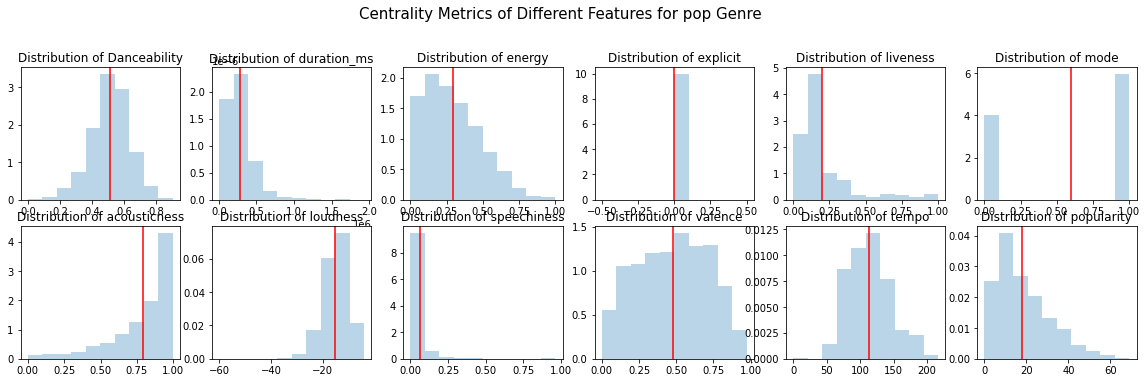

In [ ]:
filter3 = data_custom["jazz"] == True

fig, axes = plt.subplots(2, 6, figsize=(20, 6), constrained_layout=True)
fig.subplots_adjust(top=0.8)
# plot Danceability distribution and its mean
axes[0][0].set_title("Distribution of Danceability")
axes[0][0].hist(data_custom["danceability"][filter3], alpha=0.3, density=True)
axes[0][0].axvline(data_custom['danceability'][filter3].mean(), 0, 1, c="r")

# plot duration_ms distribution and its mean
axes[0][1].set_title("Distribution of duration_ms")
axes[0][1].hist(data_custom["duration_ms"][filter3], alpha=0.3, density=True)
axes[0][1].axvline(data_custom['duration_ms'][filter3].mean(), 0, 1, c="r")

# plot energy distribution and its mean
axes[0][2].set_title("Distribution of energy")
axes[0][2].hist(data_custom["energy"][filter3], alpha=0.3, density=True)
axes[0][2].axvline(data_custom['energy'][filter3].mean(), 0, 1, c="r")

# plot explicit distribution and its mean
axes[0][3].set_title("Distribution of explicit")
axes[0][3].hist(data_custom["explicit"][filter3], alpha=0.3, density=True)
axes[0][3].axvline(data_custom['explicit'][filter3].mean(), 0, 1, c="r")

# plot liveness distribution and its mean
axes[0][4].set_title("Distribution of liveness")
axes[0][4].hist(data_custom["liveness"][filter3], alpha=0.3, density=True)
axes[0][4].axvline(data_custom['liveness'][filter3].mean(), 0, 1, c="r")

# plot mode distribution and its mean
axes[0][5].set_title("Distribution of mode")
axes[0][5].hist(data_custom["mode"][filter3], alpha=0.3, density=True)
axes[0][5].axvline(data_custom['mode'][filter3].mean(), 0, 1, c="r")

# plot acousticness distribution and its mean
axes[1][0].set_title("Distribution of acousticness")
axes[1][0].hist(data_custom["acousticness"][filter3], alpha=0.3, density=True)
axes[1][0].axvline(data_custom['acousticness'][filter3].mean(), 0, 1, c="r")

# plot loudness distribution and its mean
axes[1][1].set_title("Distribution of loudness")
axes[1][1].hist(data_custom["loudness"][filter3], alpha=0.3, density=True)
axes[1][1].axvline(data_custom['loudness'][filter3].mean(), 0, 1, c="r")

# plot speechiness distribution and its mean
axes[1][2].set_title("Distribution of speechiness")
axes[1][2].hist(data_custom["speechiness"][filter3], alpha=0.3, density=True)
axes[1][2].axvline(data_custom['speechiness'][filter3].mean(), 0, 1, c="r")

# plot valence distribution and its mean
axes[1][3].set_title("Distribution of valence")
axes[1][3].hist(data_custom["valence"][filter3], alpha=0.3, density=True)
axes[1][3].axvline(data_custom['valence'][filter3].mean(), 0, 1, c="r")

# plot tempo distribution and its mean
axes[1][4].set_title("Distribution of tempo")
axes[1][4].hist(data_custom["tempo"][filter3], alpha=0.3, density=True)
axes[1][4].axvline(data_custom['tempo'][filter3].mean(), 0, 1, c="r")

# plot popularity distribution and its mean
axes[1][5].set_title("Distribution of popularity")
axes[1][5].hist(data_custom["popularity"][filter3], alpha=0.3, density=True)
axes[1][5].axvline(data_custom['popularity'][filter3].mean(), 0, 1, c="r")


fig.suptitle('Centrality Metrics of Different Features for pop Genre\n ', fontsize=15, y=0.94)


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


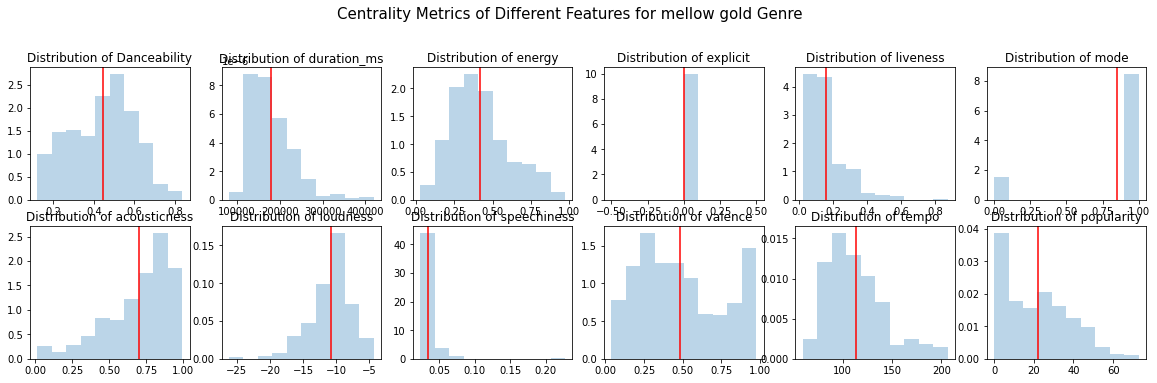

In [ ]:
filter4 = data_custom["mellow gold"] == True

fig, axes = plt.subplots(2, 6, figsize=(20, 6), constrained_layout=True)
fig.subplots_adjust(top=0.8)
# plot Danceability distribution and its mean
axes[0][0].set_title("Distribution of Danceability")
axes[0][0].hist(data_custom["danceability"][filter4], alpha=0.3, density=True)
axes[0][0].axvline(data_custom['danceability'][filter4].mean(), 0, 1, c="r")

# plot duration_ms distribution and its mean
axes[0][1].set_title("Distribution of duration_ms")
axes[0][1].hist(data_custom["duration_ms"][filter4], alpha=0.3, density=True)
axes[0][1].axvline(data_custom['duration_ms'][filter4].mean(), 0, 1, c="r")

# plot energy distribution and its mean
axes[0][2].set_title("Distribution of energy")
axes[0][2].hist(data_custom["energy"][filter4], alpha=0.3, density=True)
axes[0][2].axvline(data_custom['energy'][filter4].mean(), 0, 1, c="r")

# plot explicit distribution and its mean
axes[0][3].set_title("Distribution of explicit")
axes[0][3].hist(data_custom["explicit"][filter4], alpha=0.3, density=True)
axes[0][3].axvline(data_custom['explicit'][filter4].mean(), 0, 1, c="r")

# plot liveness distribution and its mean
axes[0][4].set_title("Distribution of liveness")
axes[0][4].hist(data_custom["liveness"][filter4], alpha=0.3, density=True)
axes[0][4].axvline(data_custom['liveness'][filter4].mean(), 0, 1, c="r")

# plot mode distribution and its mean
axes[0][5].set_title("Distribution of mode")
axes[0][5].hist(data_custom["mode"][filter4], alpha=0.3, density=True)
axes[0][5].axvline(data_custom['mode'][filter4].mean(), 0, 1, c="r")

# plot acousticness distribution and its mean
axes[1][0].set_title("Distribution of acousticness")
axes[1][0].hist(data_custom["acousticness"][filter4], alpha=0.3, density=True)
axes[1][0].axvline(data_custom['acousticness'][filter4].mean(), 0, 1, c="r")

# plot loudness distribution and its mean
axes[1][1].set_title("Distribution of loudness")
axes[1][1].hist(data_custom["loudness"][filter4], alpha=0.3, density=True)
axes[1][1].axvline(data_custom['loudness'][filter4].mean(), 0, 1, c="r")

# plot speechiness distribution and its mean
axes[1][2].set_title("Distribution of speechiness")
axes[1][2].hist(data_custom["speechiness"][filter4], alpha=0.3, density=True)
axes[1][2].axvline(data_custom['speechiness'][filter4].mean(), 0, 1, c="r")

# plot valence distribution and its mean
axes[1][3].set_title("Distribution of valence")
axes[1][3].hist(data_custom["valence"][filter4], alpha=0.3, density=True)
axes[1][3].axvline(data_custom['valence'][filter4].mean(), 0, 1, c="r")

# plot tempo distribution and its mean
axes[1][4].set_title("Distribution of tempo")
axes[1][4].hist(data_custom["tempo"][filter4], alpha=0.3, density=True)
axes[1][4].axvline(data_custom['tempo'][filter4].mean(), 0, 1, c="r")

# plot popularity distribution and its mean
axes[1][5].set_title("Distribution of popularity")
axes[1][5].hist(data_custom["popularity"][filter4], alpha=0.3, density=True)
axes[1][5].axvline(data_custom['popularity'][filter4].mean(), 0, 1, c="r")


fig.suptitle('Centrality Metrics of Different Features for mellow gold Genre\n ', fontsize=15, y=0.94)


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


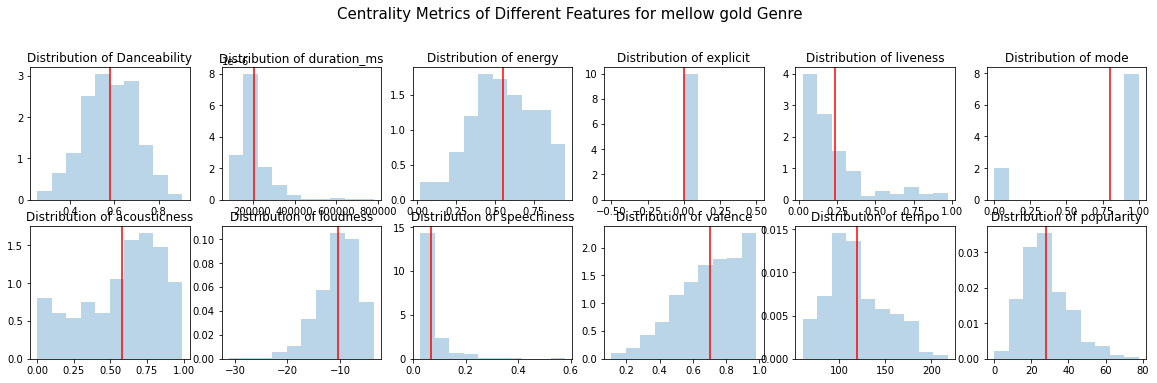

In [ ]:
filter5 = data_custom["classic rock"] == True

fig, axes = plt.subplots(2, 6, figsize=(20, 6), constrained_layout=True)
fig.subplots_adjust(top=0.8)
# plot Danceability distribution and its mean
axes[0][0].set_title("Distribution of Danceability")
axes[0][0].hist(data_custom["danceability"][filter5], alpha=0.3, density=True)
axes[0][0].axvline(data_custom['danceability'][filter5].mean(), 0, 1, c="r")

# plot duration_ms distribution and its mean
axes[0][1].set_title("Distribution of duration_ms")
axes[0][1].hist(data_custom["duration_ms"][filter5], alpha=0.3, density=True)
axes[0][1].axvline(data_custom['duration_ms'][filter5].mean(), 0, 1, c="r")

# plot energy distribution and its mean
axes[0][2].set_title("Distribution of energy")
axes[0][2].hist(data_custom["energy"][filter5], alpha=0.3, density=True)
axes[0][2].axvline(data_custom['energy'][filter5].mean(), 0, 1, c="r")

# plot explicit distribution and its mean
axes[0][3].set_title("Distribution of explicit")
axes[0][3].hist(data_custom["explicit"][filter5], alpha=0.3, density=True)
axes[0][3].axvline(data_custom['explicit'][filter5].mean(), 0, 1, c="r")

# plot liveness distribution and its mean
axes[0][4].set_title("Distribution of liveness")
axes[0][4].hist(data_custom["liveness"][filter5], alpha=0.3, density=True)
axes[0][4].axvline(data_custom['liveness'][filter5].mean(), 0, 1, c="r")

# plot mode distribution and its mean
axes[0][5].set_title("Distribution of mode")
axes[0][5].hist(data_custom["mode"][filter5], alpha=0.3, density=True)
axes[0][5].axvline(data_custom['mode'][filter5].mean(), 0, 1, c="r")

# plot acousticness distribution and its mean
axes[1][0].set_title("Distribution of acousticness")
axes[1][0].hist(data_custom["acousticness"][filter5], alpha=0.3, density=True)
axes[1][0].axvline(data_custom['acousticness'][filter5].mean(), 0, 1, c="r")

# plot loudness distribution and its mean
axes[1][1].set_title("Distribution of loudness")
axes[1][1].hist(data_custom["loudness"][filter5], alpha=0.3, density=True)
axes[1][1].axvline(data_custom['loudness'][filter5].mean(), 0, 1, c="r")

# plot speechiness distribution and its mean
axes[1][2].set_title("Distribution of speechiness")
axes[1][2].hist(data_custom["speechiness"][filter5], alpha=0.3, density=True)
axes[1][2].axvline(data_custom['speechiness'][filter5].mean(), 0, 1, c="r")

# plot valence distribution and its mean
axes[1][3].set_title("Distribution of valence")
axes[1][3].hist(data_custom["valence"][filter5], alpha=0.3, density=True)
axes[1][3].axvline(data_custom['valence'][filter5].mean(), 0, 1, c="r")

# plot tempo distribution and its mean
axes[1][4].set_title("Distribution of tempo")
axes[1][4].hist(data_custom["tempo"][filter5], alpha=0.3, density=True)
axes[1][4].axvline(data_custom['tempo'][filter5].mean(), 0, 1, c="r")

# plot popularity distribution and its mean
axes[1][5].set_title("Distribution of popularity")
axes[1][5].hist(data_custom["popularity"][filter5], alpha=0.3, density=True)
axes[1][5].axvline(data_custom['popularity'][filter5].mean(), 0, 1, c="r")


fig.suptitle('Centrality Metrics of Different Features for classic rock Genre\n ', fontsize=15, y=0.94)


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


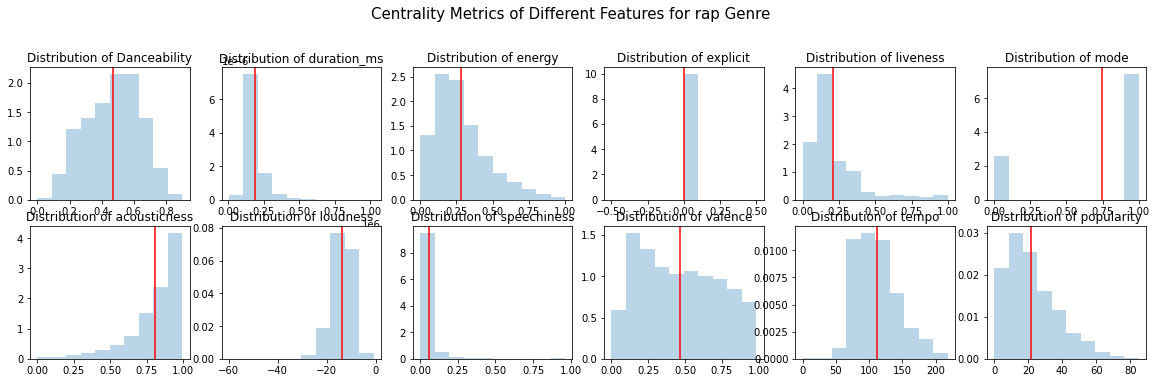

In [ ]:
filter7 = data_custom["adult standards"] == True

fig, axes = plt.subplots(2, 6, figsize=(20, 6), constrained_layout=True)
fig.subplots_adjust(top=0.8)
# plot Danceability distribution and its mean
axes[0][0].set_title("Distribution of Danceability")
axes[0][0].hist(data_custom["danceability"][filter7], alpha=0.3, density=True)
axes[0][0].axvline(data_custom['danceability'][filter7].mean(), 0, 1, c="r")

# plot duration_ms distribution and its mean
axes[0][1].set_title("Distribution of duration_ms")
axes[0][1].hist(data_custom["duration_ms"][filter7], alpha=0.3, density=True)
axes[0][1].axvline(data_custom['duration_ms'][filter7].mean(), 0, 1, c="r")

# plot energy distribution and its mean
axes[0][2].set_title("Distribution of energy")
axes[0][2].hist(data_custom["energy"][filter7], alpha=0.3, density=True)
axes[0][2].axvline(data_custom['energy'][filter7].mean(), 0, 1, c="r")

# plot explicit distribution and its mean
axes[0][3].set_title("Distribution of explicit")
axes[0][3].hist(data_custom["explicit"][filter7], alpha=0.3, density=True)
axes[0][3].axvline(data_custom['explicit'][filter7].mean(), 0, 1, c="r")

# plot liveness distribution and its mean
axes[0][4].set_title("Distribution of liveness")
axes[0][4].hist(data_custom["liveness"][filter7], alpha=0.3, density=True)
axes[0][4].axvline(data_custom['liveness'][filter7].mean(), 0, 1, c="r")

# plot mode distribution and its mean
axes[0][5].set_title("Distribution of mode")
axes[0][5].hist(data_custom["mode"][filter7], alpha=0.3, density=True)
axes[0][5].axvline(data_custom['mode'][filter7].mean(), 0, 1, c="r")

# plot acousticness distribution and its mean
axes[1][0].set_title("Distribution of acousticness")
axes[1][0].hist(data_custom["acousticness"][filter7], alpha=0.3, density=True)
axes[1][0].axvline(data_custom['acousticness'][filter7].mean(), 0, 1, c="r")

# plot loudness distribution and its mean
axes[1][1].set_title("Distribution of loudness")
axes[1][1].hist(data_custom["loudness"][filter7], alpha=0.3, density=True)
axes[1][1].axvline(data_custom['loudness'][filter7].mean(), 0, 1, c="r")

# plot speechiness distribution and its mean
axes[1][2].set_title("Distribution of speechiness")
axes[1][2].hist(data_custom["speechiness"][filter7], alpha=0.3, density=True)
axes[1][2].axvline(data_custom['speechiness'][filter7].mean(), 0, 1, c="r")

# plot valence distribution and its mean
axes[1][3].set_title("Distribution of valence")
axes[1][3].hist(data_custom["valence"][filter7], alpha=0.3, density=True)
axes[1][3].axvline(data_custom['valence'][filter7].mean(), 0, 1, c="r")

# plot tempo distribution and its mean
axes[1][4].set_title("Distribution of tempo")
axes[1][4].hist(data_custom["tempo"][filter7], alpha=0.3, density=True)
axes[1][4].axvline(data_custom['tempo'][filter7].mean(), 0, 1, c="r")

# plot popularity distribution and its mean
axes[1][5].set_title("Distribution of popularity")
axes[1][5].hist(data_custom["popularity"][filter7], alpha=0.3, density=True)
axes[1][5].axvline(data_custom['popularity'][filter7].mean(), 0, 1, c="r")


fig.suptitle('Centrality Metrics of Different Features for adult standarts Genre\n ', fontsize=15, y=0.94)


plt.show()

##Based on Years

In [ ]:
import matplotlib.pyplot as plt
year_data = data_custom.groupby(['year']).mean().reset_index()
year_data

,year,Unnamed: 0,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,rock,classic rock,adult standards,mellow gold,album rock,folk rock,soft rock,classical,country rock,vocal jazz,soul,lounge,art rock,hard rock,brill building pop,folk,jazz,cool jazz,bebop,psychedelic rock,roots rock,blues rock,dance pop,dance rock,pop,rap,permanent wave,swing,funk,hip hop
0,1920,14726.732635,0.792734,0.585520,185738.055960,0.247822,0.127554,0.363918,5.310712,0.211486,-16.524738,0.692485,1.193107,0.296305,110.304984,0.545224,0.000178,0.000355,0.033043,0.000000,0.000000,0.000178,0.000000,0.122579,0.000178,0.034287,0.010126,0.012791,0.000000,0.000000,0.000000,0.010659,0.013146,0.000888,0.014212,0.006928,0.000178,0.000533,0.000000,0.000000,0.001954,0.000000,0.000000,0.047255,0.000178,0.000178
1,1930,39139.892601,0.816479,0.559372,197997.471847,0.279372,0.055840,0.241766,5.158120,0.223175,-15.285920,0.697348,2.212936,0.294912,110.923144,0.568122,0.000000,0.000093,0.089809,0.000372,0.000000,0.000000,0.000186,0.077897,0.000465,0.087855,0.045603,0.084597,0.000093,0.000000,0.001489,0.015449,0.023546,0.015821,0.023918,0.015914,0.000093,0.006049,0.000093,0.000093,0.002327,0.000093,0.000000,0.060028,0.000093,0.000093
2,1940,52014.233241,0.872016,0.474062,217787.468809,0.254222,0.068912,0.365763,5.172345,0.220767,-15.325884,0.703278,1.812399,0.152929,107.365364,0.488909,0.000582,0.000388,0.042666,0.000776,0.000323,0.000388,0.000453,0.268343,0.001487,0.034262,0.007434,0.035749,0.000129,0.000259,0.013446,0.012606,0.018359,0.018553,0.017777,0.000000,0.000129,0.000000,0.005560,0.000065,0.005495,0.000000,0.000000,0.032840,0.000065,0.000000
3,1950,60875.123446,0.838623,0.478286,219404.602988,0.285195,0.007772,0.244233,5.051645,0.210493,-14.800545,0.713598,10.739621,0.104081,110.577726,0.477645,0.002106,0.005215,0.235058,0.005716,0.000000,0.007822,0.000903,0.150421,0.007521,0.197754,0.053951,0.170227,0.001103,0.000000,0.049840,0.009276,0.167218,0.171029,0.164160,0.000050,0.000201,0.009025,0.000000,0.000050,0.000000,0.000000,0.000100,0.126554,0.004964,0.000000
4,1960,66903.550760,0.630479,0.492035,210497.340690,0.411917,0.000616,0.165346,5.097208,0.208251,-12.686085,0.754670,26.373794,0.057083,115.016295,0.548588,0.167419,0.189437,0.267502,0.115274,0.065746,0.184613,0.059074,0.036902,0.091716,0.122254,0.135496,0.132622,0.056867,0.031205,0.203038,0.086071,0.098029,0.099723,0.095617,0.138011,0.070314,0.066670,0.003747,0.011856,0.002566,0.000103,0.008007,0.039468,0.057842,0.000000
5,1970,82958.944065,0.403231,0.524654,252769.150518,0.530918,0.003417,0.117335,5.087848,0.215156,-11.442434,0.742989,34.535682,0.061621,119.710674,0.583336,0.375967,0.382702,0.089456,0.312494,0.274651,0.248367,0.264197,0.011509,0.216404,0.014725,0.113981,0.011458,0.163584,0.137552,0.040054,0.136295,0.016333,0.014172,0.014323,0.108755,0.143432,0.119610,0.006332,0.068148,0.005729,0.003367,0.050608,0.003216,0.102573,0.002915
6,1980,95760.568976,0.307505,0.544118,250847.474900,0.588954,0.023193,0.125155,5.268926,0.203525,-11.342862,0.709890,36.973143,0.061994,121.101650,0.561468,0.308986,0.177711,0.054669,0.171486,0.186044,0.076054,0.169528,0.030673,0.094177,0.012651,0.047992,0.010392,0.108283,0.134036,0.015612,0.042570,0.006677,0.006576,0.006225,0.019478,0.042319,0.031878,0.023594,0.154869,0.012249,0.019378,0.095683,0.003514,0.052209,0.019528
7,1990,107494.460054,0.318422,0.565024,247323.401727,0.578990,0.112855,0.118696,5.329435,0.195924,-10.146249,0.721984,43.132445,0.079977,119.357464,0.544546,0.167876,0.045300,0.044066,0.050037,0.044856,0.024870,0.046188,0.017666,0.058327,0.018011,0.028966,0.014508,0.028966,0.058377,0.019936,0.028226,0.009228,0.008833,0.008833,0.007895,0.023390,0.023341,0.065778,0.022699,0.029312,0.081964,0.063311,0.010363,0.026104,0.098643
8,2000,118766.672270,0.270187,0.566586,238218.575566,0.659299,0.127265,0.126576,5.254966,0.212149,-7.823843,0.686531,43.201994,0.085231,121.443743,0.5365

In [ ]:
def plot_years(year_data):
  fig, axes = plt.subplots(2, 6, figsize=(24, 12), constrained_layout=True)
  fig.subplots_adjust(top=0.8)

  # plot acousticness over year
  axes[0][0].set_title(" acousticness")
  axes[0][0].plot(year_data['year'], year_data['acousticness'])

  # plot danceability over year
  axes[0][1].set_title(" danceability ")
  axes[0][1].plot(year_data['year'], year_data['danceability'])

  # plot duration_ms over year
  axes[0][2].set_title(" duration_ms ")
  axes[0][2].plot(year_data['year'], year_data['duration_ms'])

  # plot energy over year
  axes[0][3].set_title(" energy")
  axes[0][3].plot(year_data['year'], year_data['energy'])

  # plot explicit over year
  axes[0][4].set_title(" explicit ")
  axes[0][4].plot(year_data['year'], year_data['explicit'])

  # plot valence over year
  axes[0][5].set_title(" valence ")
  axes[0][5].plot(year_data['year'], year_data['valence'])

  # plot instrumentalness over year
  axes[1][0].set_title(" instrumentalness ")
  axes[1][0].plot(year_data['year'], year_data['instrumentalness'])

  # plot liveness over year
  axes[1][1].set_title(" liveness ")
  axes[1][1].plot(year_data['year'], year_data['liveness'])

  # plot mode over year
  axes[1][2].set_title(" mode ")
  axes[1][2].plot(year_data['year'], year_data['mode'])

  # plot speechiness over year
  axes[1][3].set_title(" speechiness")
  axes[1][3].plot(year_data['year'], year_data['speechiness'])

  # plot tempo over year
  axes[1][4].set_title(" tempo ")
  axes[1][4].plot(year_data['year'], year_data['tempo'])

  # plot popularity over year
  axes[1][5].set_title(" popularity ")
  axes[1][5].plot(year_data['year'], year_data['popularity'])


  fig.suptitle('Change of features over Years', fontsize=25, y=0.90)
  fig.text(0.5, 0.04, 'YEAR', ha='center', fontsize = 30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


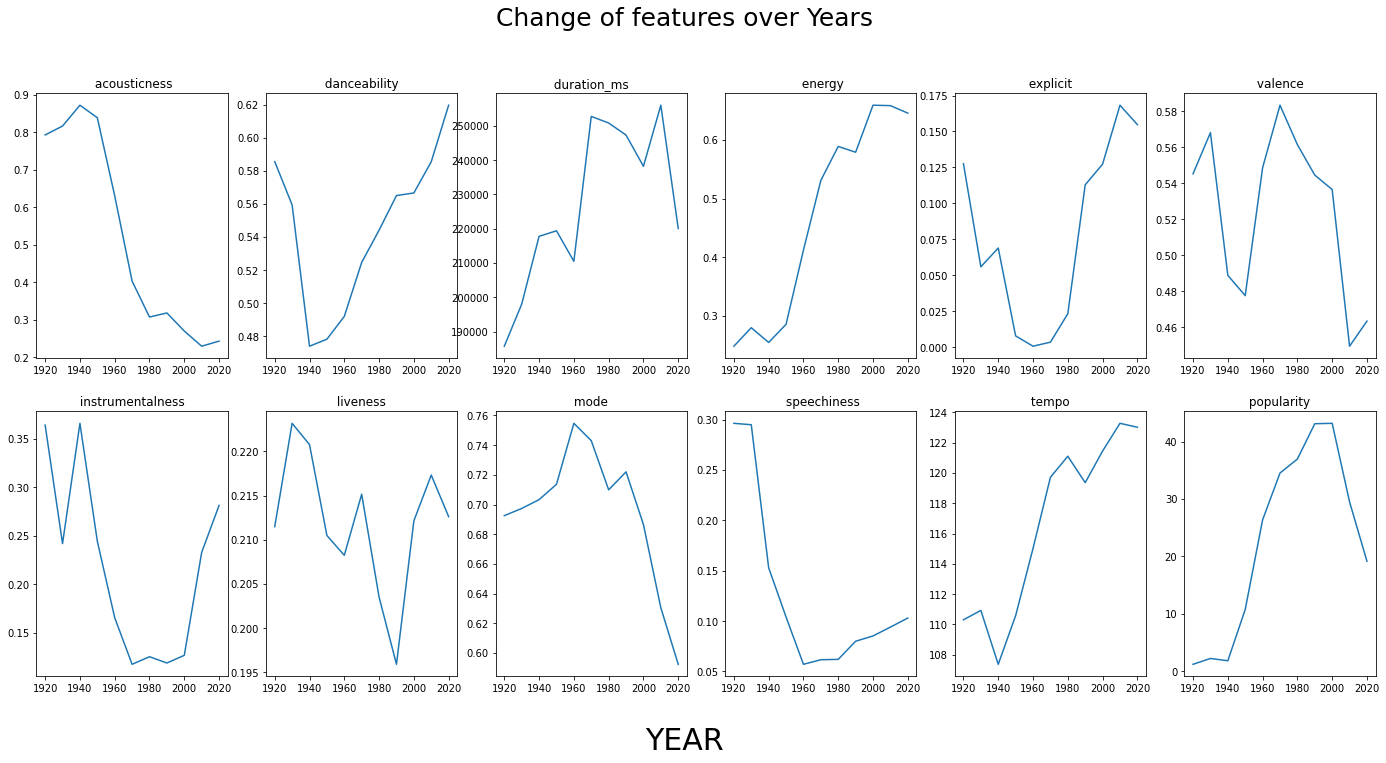

In [ ]:
plot_years(year_data)

#3. Analysis of the most popular artists and songs.

acousticness              0.996
energy                    1.000
popularity              100.000
duration_ms         5338302.000
instrumentalness          1.000
explicit                  1.000
liveness                  1.000
loudness                  3.855
mode                      1.000
speechiness               0.971
tempo                   243.507
valence                   1.000
dtype: float64

In [ ]:
df = data_custom.sort_values('popularity', ascending = False)
df[['artists','name','popularity']].head(50)

,artists,name,popularity
35417,Andy Williams,It's the Most Wonderful Time of the Year,85.0
8407,Frank Sinatra,Let It Snow! Let It Snow! Let It Snow! (with T...,84.0
8962,Bing Crosby,White Christmas,80.0
23046,The Pogues,Fairytale of New York (feat. Kirsty MacColl),78.0
32277,Bill Withers,Ain't No Sunshine,77.0
36886,Dolly Parton,9 to 5,76.0
32284,Bill Withers,Lovely Day,75.0
27894,Johnny Cash,Hurt,75.0
9018,Bing Crosby,Do You Hear What I Hear? - Remastered 2006,75.0
26791,Aretha Franklin,I Say a Little Prayer,75.0


In [ ]:
from collections import Counter
list1 = (Counter(df['artists'].values).most_common(10))
print(list1)

[('Francisco Canaro', 2228), ('Tadeusz Dolega Mostowicz', 1281), ('Эрнест Хемингуэй', 1175), ('Эрих Мария Ремарк', 1062), ('Frédéric Chopin', 1012), ('Wolfgang Amadeus Mozart', 915), ('Johann Sebastian Bach', 895), ('Ludwig van Beethoven', 891), ('Frank Sinatra', 731), ('Georgette Heyer', 690)]


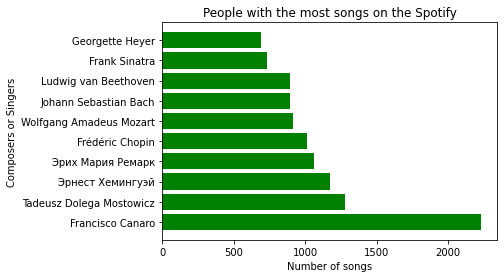

In [ ]:
import matplotlib.pyplot as plt
bar_plot = dict(Counter(df['artists'].values).most_common(10))
plt.barh(*zip(*bar_plot.items()),color='green')

plt.xlabel("Number of songs")
plt.ylabel("Composers or Singers")
plt.title("People with the most songs on the Spotify")

plt.show()

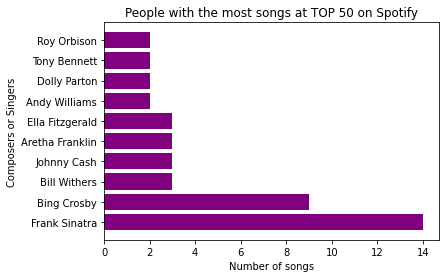

In [ ]:
bar_plot_two = dict(Counter(df['artists'].head(50)).most_common(10))
plt.barh(*zip(*bar_plot_two.items()),color = 'purple')

plt.xlabel("Number of songs")
plt.ylabel("Composers or Singers")
plt.title("People with the most songs at TOP 50 on Spotify")

plt.show()

In [ ]:
df.groupby(by = 'jazz')['popularity'].mean()

jazz
0.0     5.558497
1.0    10.472231
Name: popularity, dtype: float64

#4. Analyzing how songs of different genres change with time

##Rock 

In [ ]:
data_custom[["acousticness","energy","popularity","duration_ms","instrumentalness","explicit","liveness","loudness","mode","speechiness","tempo","valence","danceability"]].max()

acousticness              0.996
energy                    1.000
popularity              100.000
duration_ms         5338302.000
instrumentalness          1.000
explicit                  1.000
liveness                  1.000
loudness                  3.855
mode                      1.000
speechiness               0.971
tempo                   243.507
valence                   1.000
danceability              0.988
dtype: float64

In [ ]:
data_custom[["acousticness","energy","popularity","duration_ms","instrumentalness","explicit","liveness","loudness","mode","speechiness","tempo","valence","danceability"]].min()

acousticness           0.0
energy                 0.0
popularity             0.0
duration_ms         4937.0
instrumentalness       0.0
explicit               0.0
liveness               0.0
loudness             -60.0
mode                   0.0
speechiness            0.0
tempo                  0.0
valence                0.0
danceability           0.0
dtype: float64

In [ ]:
rock_data = data_custom.loc[data_custom['rock']==1]
rock_data = rock_data.groupby(['year']).mean().reset_index()
rock_data

,year,Unnamed: 0,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,rock,classic rock,adult standards,mellow gold,album rock,folk rock,soft rock,classical,country rock,vocal jazz,soul,lounge,art rock,hard rock,brill building pop,folk,jazz,cool jazz,bebop,psychedelic rock,roots rock,blues rock,dance pop,dance rock,pop,rap,permanent wave,swing,funk,hip hop
0,1920,121573.000000,0.791000,0.494000,126642.000000,0.584000,0.000000,0.044500,1.000000,0.104000,-10.902000,1.000000,0.000000,0.239000,84.273000,0.443000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
1,1940,135289.111111,0.979222,0.487778,157538.666667,0.247578,0.000000,0.469438,6.222222,0.353022,-14.977556,0.888889,0.111111,0.139167,98.273000,0.593889,1.0,0.444444,0.000000,0.444444,0.444444,0.000000,0.444444,0.0,0.000000,0.0,0.000000,0.0,0.111111,0.444444,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.111111,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
2,1950,53992.357143,0.670562,0.606667,169301.857143,0.596333,0.000000,0.156563,3.904762,0.179190,-9.806857,0.714286,29.428571,0.064743,122.621619,0.742595,1.0,0.952381,0.857143,0.095238,0.000000,0.095238,0.047619,0.0,0.047619,0.0,0.857143,0.0,0.047619,0.000000,0.047619,0.095238,0.0,0.0,0.0,0.023810,0.047619,0.880952,0.000000,0.000000,0.00000,0.000000,0.047619,0.0,0.000000,0.000000
3,1960,59983.736971,0.397444,0.489972,208885.516248,0.546655,0.000307,0.113034,5.287247,0.217560,-10.651472,0.796444,31.999080,0.054052,121.207522,0.582399,1.0,0.980687,0.022379,0.448498,0.378602,0.636726,0.213366,0.0,0.320969,0.0,0.026977,0.0,0.272532,0.178725,0.235745,0.256591,0.0,0.0,0.0,0.655120,0.367259,0.267014,0.000000,0.057020,0.00000,0.000000,0.038320,0.0,0.008277,0.000000
4,1970,70940.103596,0.298493,0.497025,258206.680524,0.595965,0.003208,0.104108,5.014838,0.241683,-10.614372,0.776768,35.356369,0.055976,123.663319,0.570165,1.0,0.913915,0.018981,0.556476,0.674509,0.440182,0.451678,0.0,0.307847,0.0,0.012164,0.0,0.350087,0.356503,0.041839,0.174709,0.0,0.0,0.0,0.246758,0.275097,0.262532,0.000000,0.125919,0.00000,0.000000,0.122978,0.0,0.005882,0.000000
5,1980,83204.726401,0.142402,0.505194,261441.652478,0.724869,0.025833,0.103890,5.260276,0.249930,-9.217808,0.714379,37.498944,0.058446,125.779176,0.551194,1.0,0.536637,0.003574,0.355483,0.542648,0.167506,0.323802,0.0,0.127376,0.0,0.002762,0.0,0.242080,0.404062,0.008936,0.056539,0.0,0.0,0.0,0.060114,0.091633,0.083997,0.004062,0.258976,0.00000,0.005686,0.258489,0.0,0.000162,0.005686
6,1990,93299.422986,0.135729,0.474373,270201.791005,0.719905,0.105820,0.124056,5.213698,0.224604,-8.343969,0.742504,44.440329,0.061236,123.144185,0.458327,1.0,0.246620,0.004409,0.158142,0.246914,0.074074,0.124633,0.0,0.080247,0.0,0.001176,0.0,0.123751,0.325691,0.004997,0.034685,0.0,0.0,0.0,0.040270,0.065256,0.105526,0.004115,0.069665,0.00000,0.016755,0.265432,0.0,0.000294,0.016755
7,2000,101436.152699,0.147168,0.494053,249687.470881,0.741160,0.062500,0.098885,5.212358,0.216116,-6.499491,0.716619,49.310369,0.057778,125.775295,0.491788,1.0,0.234375,0.004972,0.136364,0.161222,0.096591,0.116477,0.0,0.061080,0.0,0.001420,0.0,0.089489,0.107244,0.004972,0.024858,0.0,0.0,0.0,0.048295,0.058949,0.097301,0.001420,0.048295,0.00000,0.000710,0.343040,0.0,0.008523,0.000710
8,2010,95742.317218,0.162408,0.512092,242057.628499,0.697014,0.037320,0.073472,5.117897,0.224762,-7.940014,0.700594,30.935539,0.058244,123.986557,0.529488,1.0,0.506361,0.000848,0.220526,0.435963,0.151824,0.212892,0.0,0.208651,0.0,0.000848,0.0,0.365564,0.290925,0.055980,0.039864,0.0,0.0,0.0,0.220526,0.041561,0.191688,0.009330,0.143342,0.02799,0.000848,0.192536,0.0,0.006785,0.000848
9,2020,79177.567568,0.349028,0.524757,222849.567568,0.623703,0.054054,0.022517,4.351351,0.298008,-9.

In [ ]:
def plot_features(rock_data, genre):
  fig, axes = plt.subplots(2, 6, figsize=(24, 12), constrained_layout=True)
  fig.subplots_adjust(top=0.8)

  # plot acousticness over year
  axes[0][0].set_title(" acousticness")
  axes[0][0].plot(rock_data['year'], rock_data['acousticness'])
  axes[0][0].set_ylim(0,1)

  # plot danceability over year
  axes[0][1].set_title(" danceability ")
  axes[0][1].plot(rock_data['year'], rock_data['danceability'])
  axes[0][1].set_ylim(0,1)

  # plot duration_ms over year
  axes[0][2].set_title(" duration_ms ")
  axes[0][2].plot(rock_data['year'], rock_data['duration_ms'])
  axes[0][2].set_ylim(4000,550000)

  # plot energy over year
  axes[0][3].set_title(" energy")
  axes[0][3].plot(rock_data['year'], rock_data['energy'])
  axes[0][3].set_ylim(0,1)

  # plot explicit over year
  axes[0][4].set_title(" explicit ")
  axes[0][4].plot(rock_data['year'], rock_data['explicit'])
  axes[0][4].set_ylim(0,1)

  # plot valence over year
  axes[0][5].set_title(" valence ")
  axes[0][5].plot(rock_data['year'], rock_data['valence'])
  axes[0][5].set_ylim(0,1)

  # plot instrumentalness over year
  axes[1][0].set_title(" instrumentalness ")
  axes[1][0].plot(rock_data['year'], rock_data['instrumentalness'])
  axes[1][0].set_ylim(0,1)

  # plot liveness over year
  axes[1][1].set_title(" liveness ")
  axes[1][1].plot(rock_data['year'], rock_data['liveness'])
  axes[1][1].set_ylim(0,1)

  # plot mode over year
  axes[1][2].set_title(" mode ")
  axes[1][2].plot(rock_data['year'], rock_data['mode'])
  axes[1][2].set_ylim(0,1)

  # plot speechiness over year
  axes[1][3].set_title(" speechiness")
  axes[1][3].plot(rock_data['year'], rock_data['speechiness'])
  axes[1][3].set_ylim(0,1)

  # plot tempo over year
  axes[1][4].set_title(" tempo ")
  axes[1][4].plot(rock_data['year'], rock_data['tempo'])
  axes[1][4].set_ylim(0,250)


  # plot popularity over year
  axes[1][5].set_title(" popularity ")
  axes[1][5].plot(rock_data['year'], rock_data['popularity'])
  axes[1][5].set_ylim(0,100)


  fig.suptitle('Change of '+ genre +' Genre over Years', fontsize=25, y=0.90)
  fig.text(0.5, 0.04, 'YEAR', ha='center', fontsize = 30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


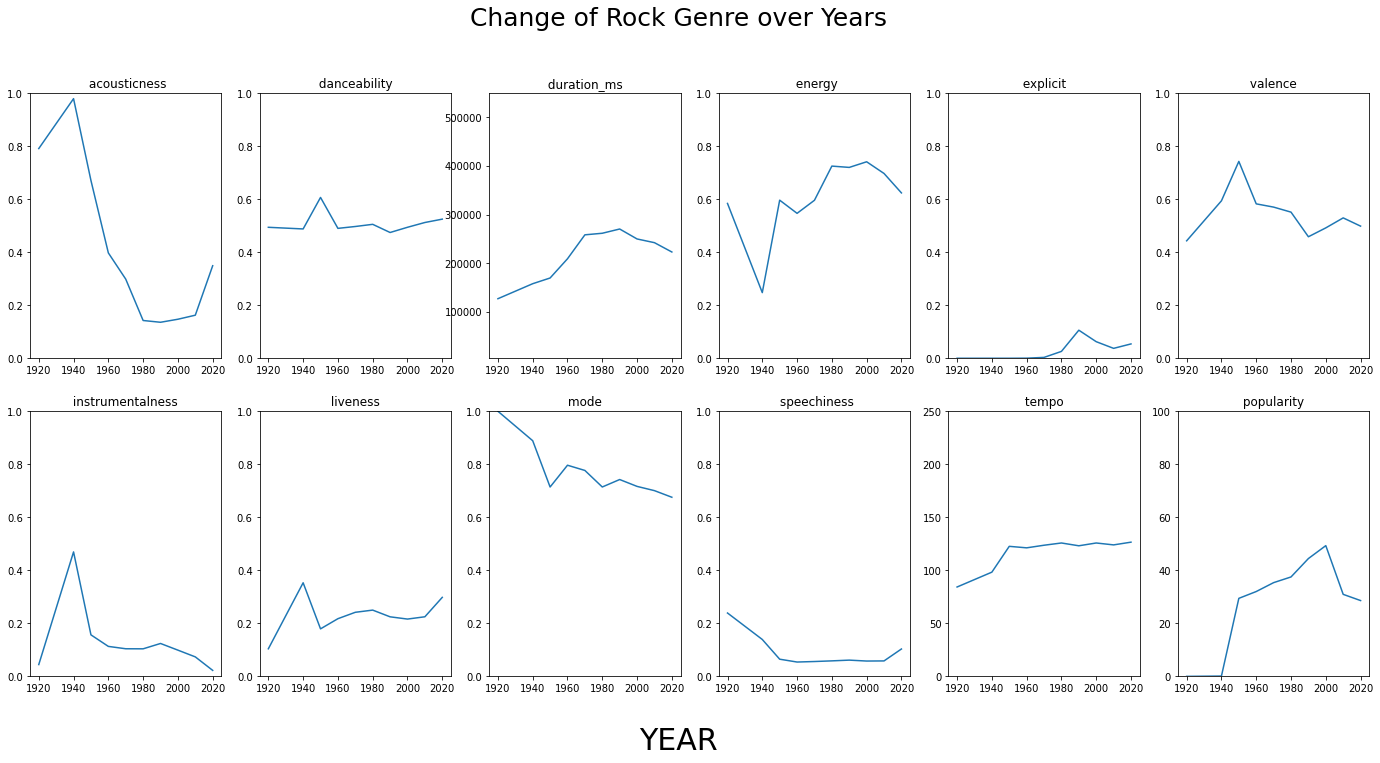

In [ ]:
plot_features(rock_data,'Rock')

##Classic Rock

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


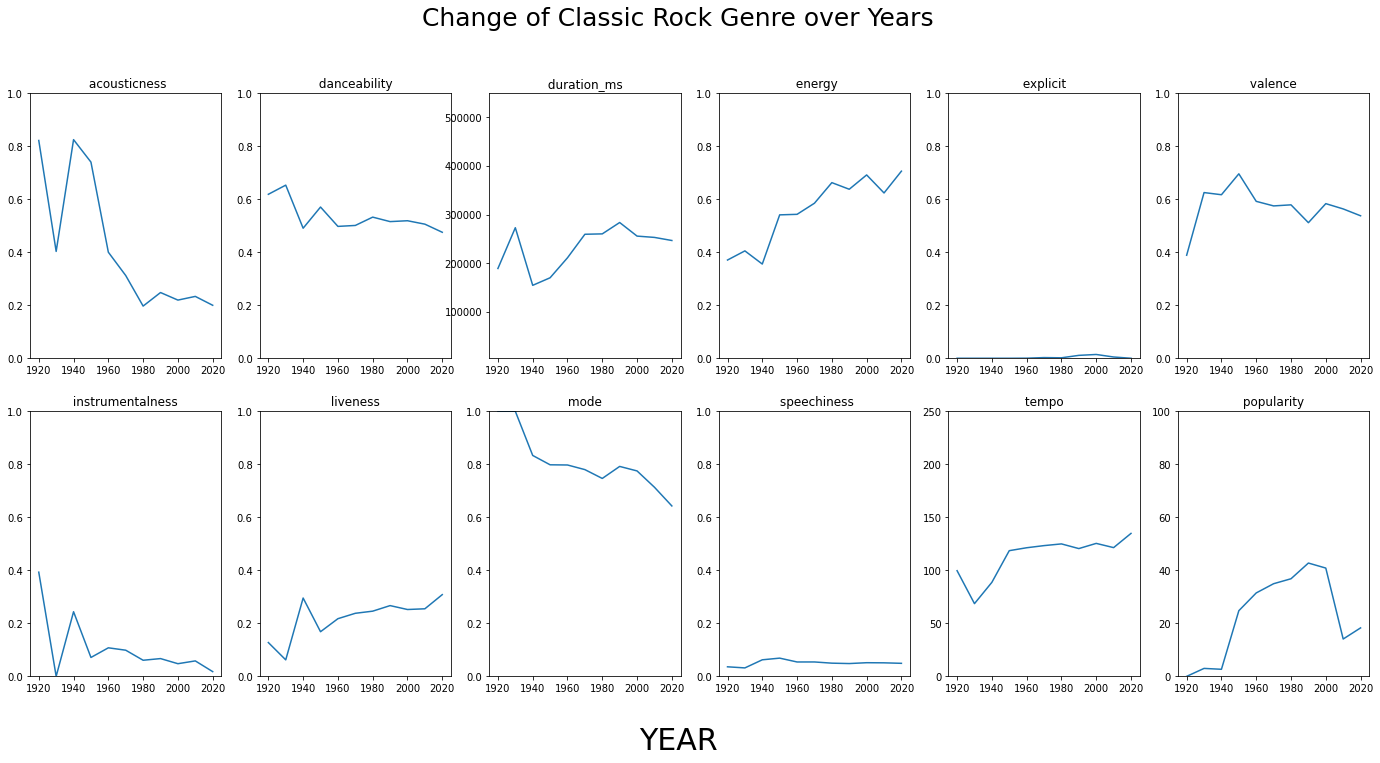

In [ ]:
rock_data = data_custom.loc[data_custom['classic rock']==1]
rock_data = rock_data.groupby(['year']).mean().reset_index()
plot_features(rock_data,'Classic Rock')

##Jazz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


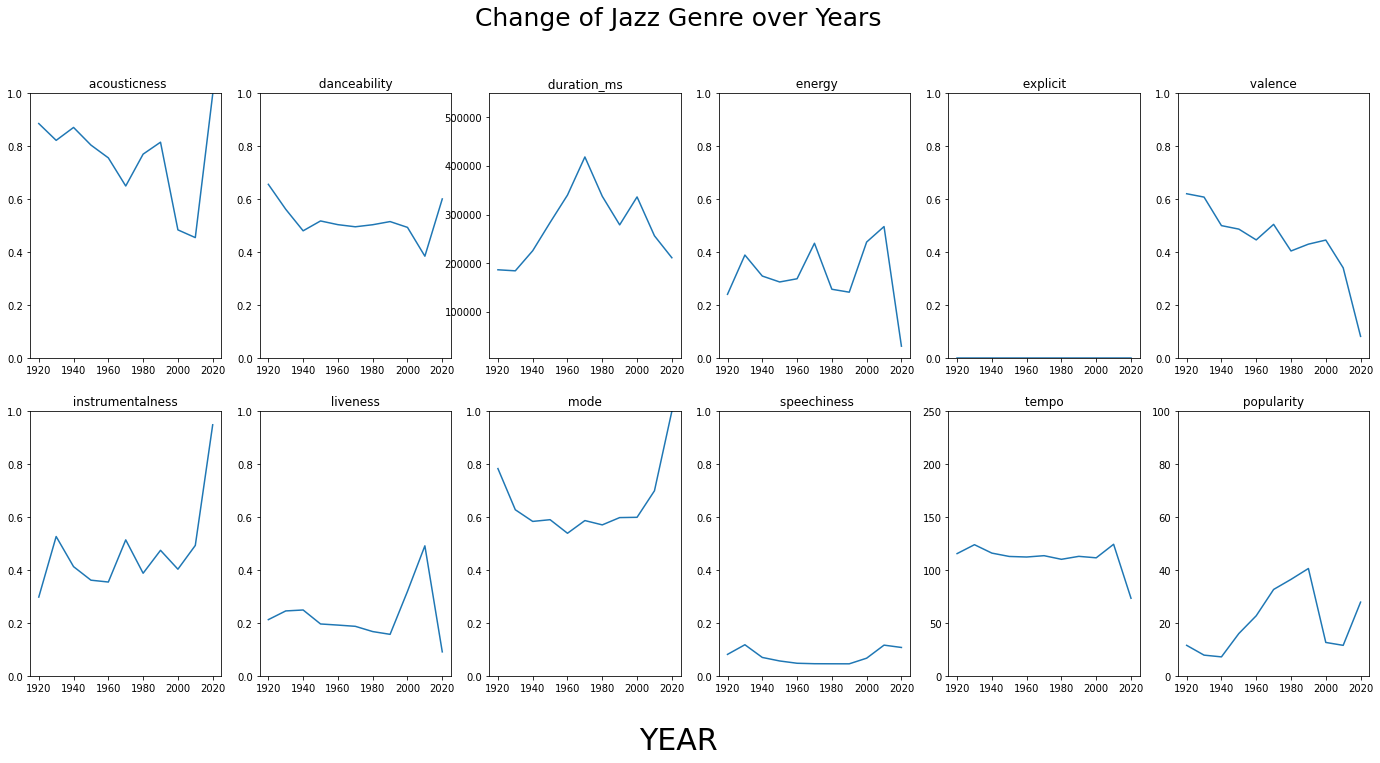

In [ ]:
rock_data = data_custom.loc[data_custom['jazz']==1]
rock_data = rock_data.groupby(['year']).mean().reset_index()
plot_features(rock_data,'Jazz')

##Pop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


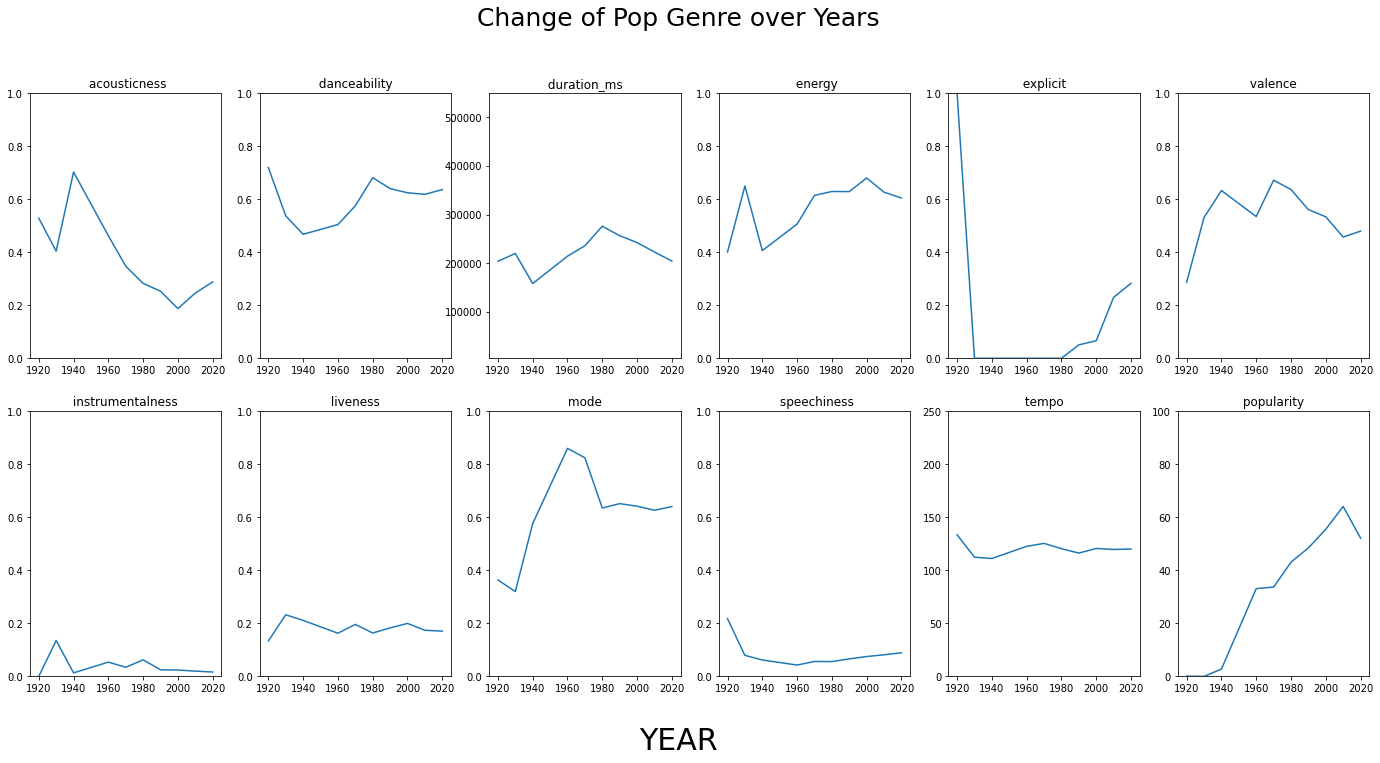

In [ ]:
rock_data = data_custom.loc[data_custom['pop']==1]
rock_data = rock_data.groupby(['year']).mean().reset_index()
plot_features(rock_data,'Pop')

##Rap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


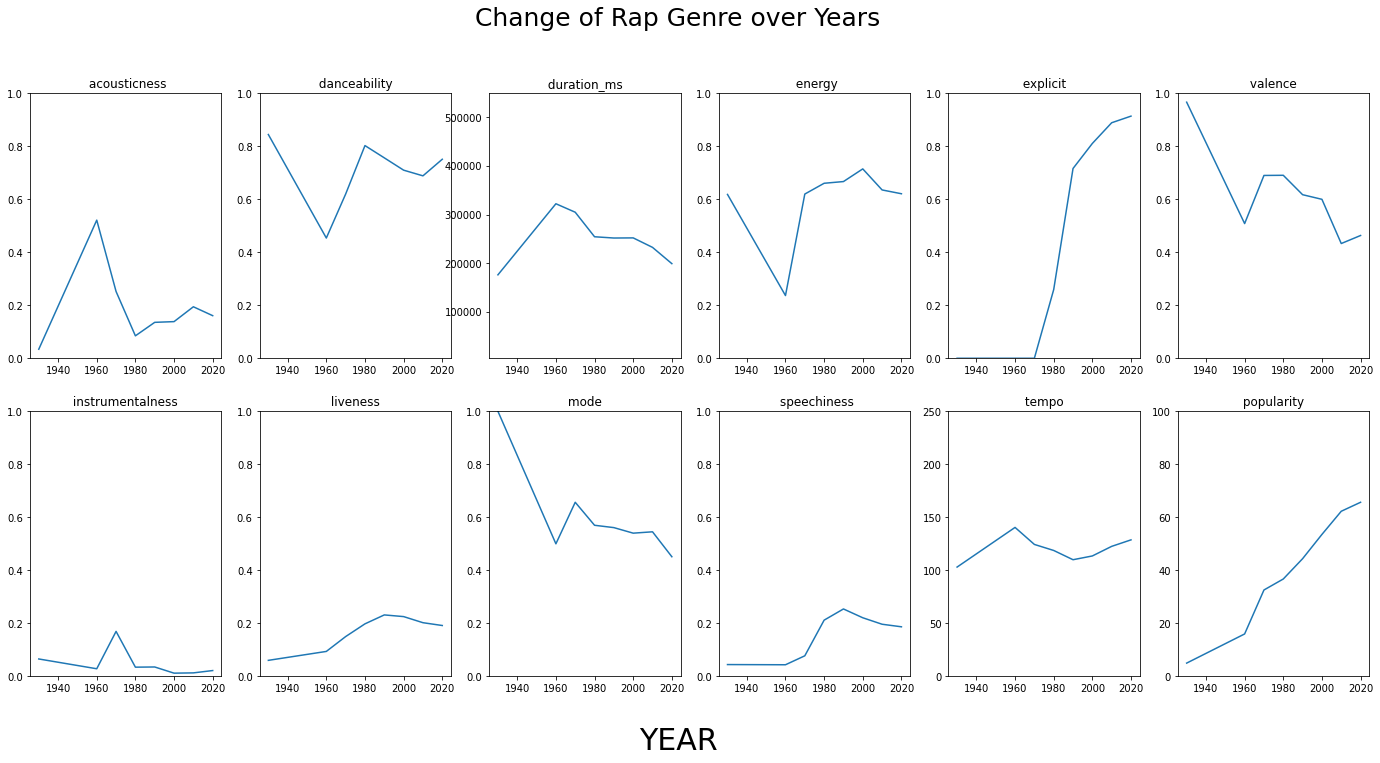

In [ ]:
rock_data = data_custom.loc[data_custom['rap']==1]
rock_data = rock_data.groupby(['year']).mean().reset_index()
plot_features(rock_data,'Rap')

##Adult Standards




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


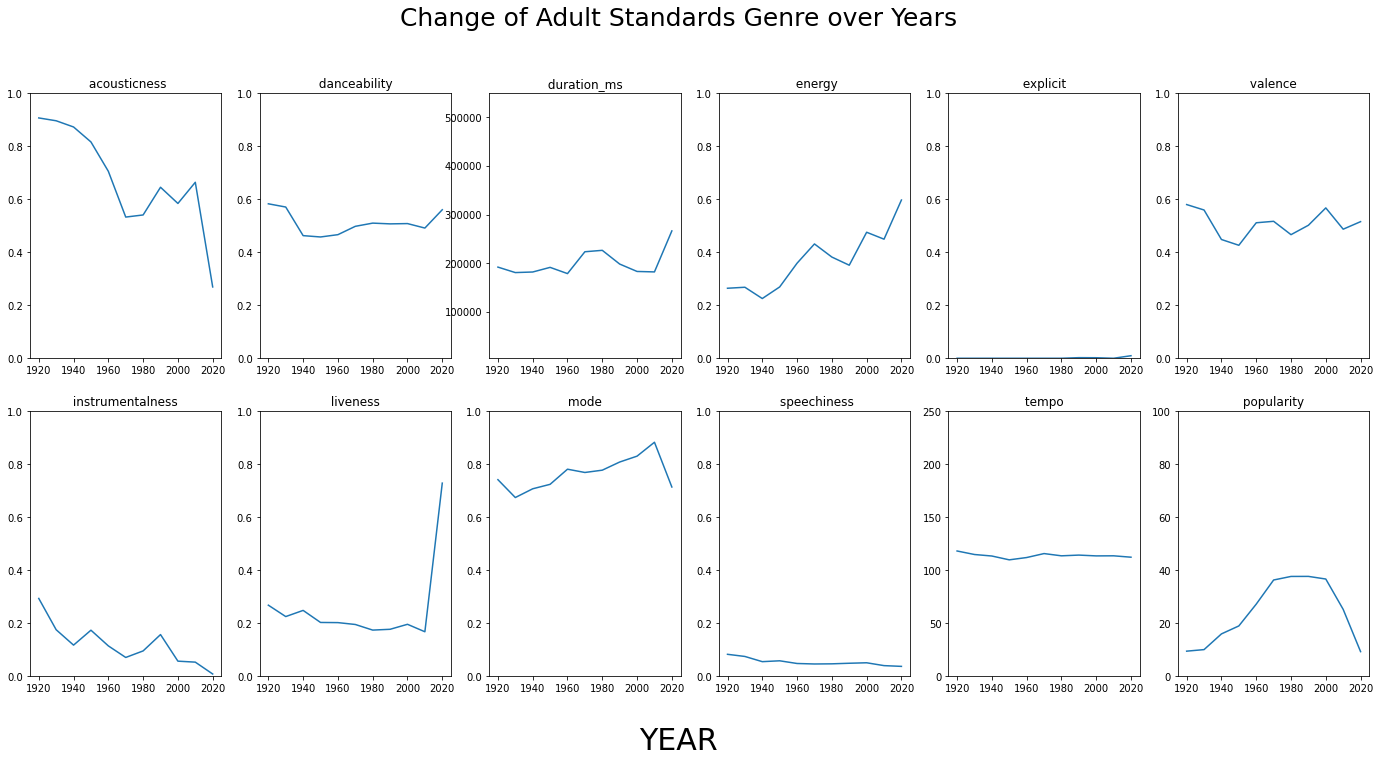

In [ ]:
rock_data = data_custom.loc[data_custom['adult standards']==1]
rock_data = rock_data.groupby(['year']).mean().reset_index()
plot_features(rock_data,'Adult Standards')

##Mellow Gold

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


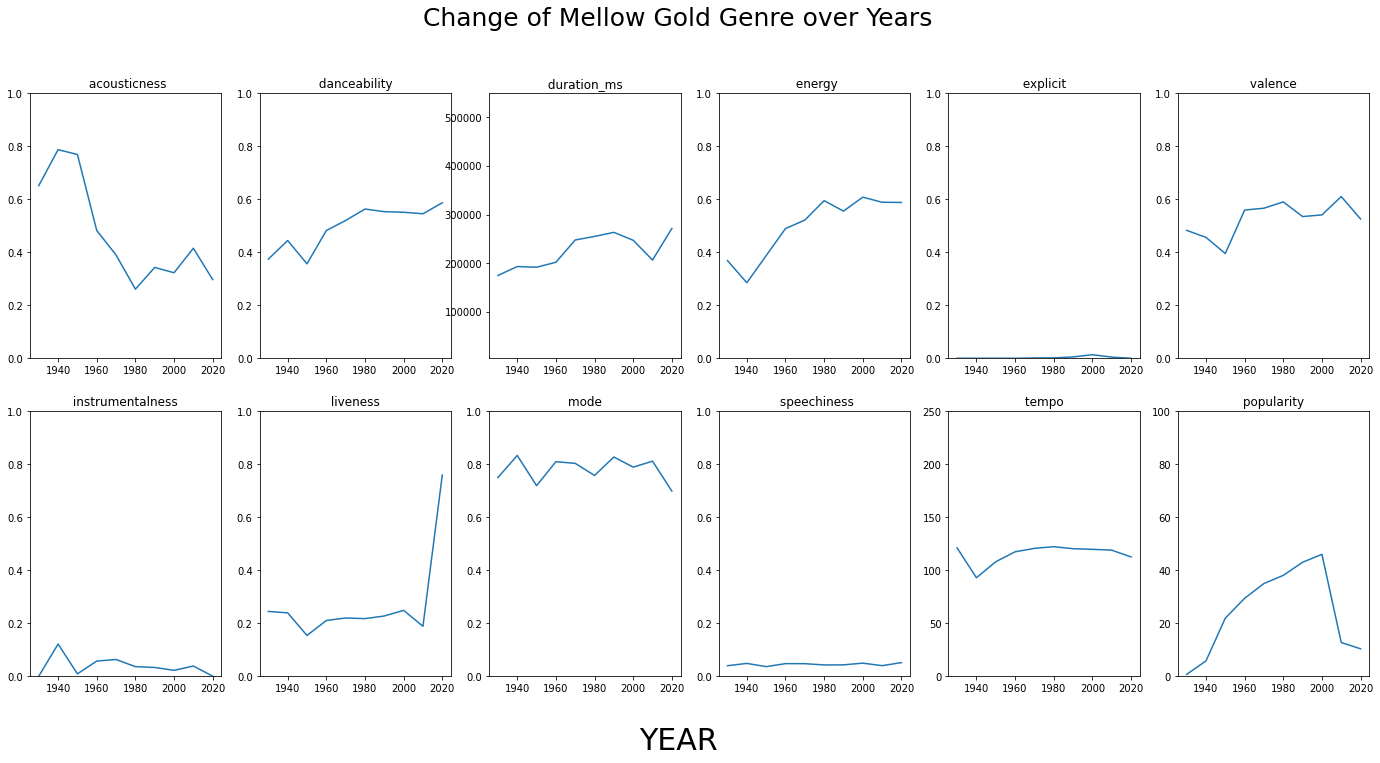

In [ ]:
rock_data = data_custom.loc[data_custom['mellow gold']==1]
rock_data = rock_data.groupby(['year']).mean().reset_index()
plot_features(rock_data,'Mellow Gold')